In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Read dataset
 Attribute Information: (class attribute has been moved to last column)
 
| Attribute  | Domain |
|:--------------:| ------------- |
|Sample code number  | 1 - 10  |
|Clump Thickness| 1 - 10  |
|Uniformity of Cell Size| 1 - 10  |
|Uniformity of Cell Shape  | 1 - 10  |
|Marginal Adhesion  | 1 - 10  |
|Single Epithelial Cell Size  | 1 - 10  |
|Bare Nuclei  | 1 - 10  |
|Bland Chromatin  | 1 - 10  |
|Normal Nucleoli  | 1 - 10  |
|Mitoses  | 1 - 10  |
|Class  | 2 for benign, 4 for malignant  |

##  Create the column names and read data

In [2]:
columnNames = [
    'Sample code number',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
]
data = pd.read_csv('breast-cancer-wisconsin.data', names = columnNames)
print(data.shape)
data.head(10)

(699, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Remove missing attribute values
>According to the documentation: There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?". 

In [3]:
#Replace ？ with NaN
data = data.replace(to_replace='?',value = np.nan)
#Discard data with missing values (discard as long as one dimension is missing)
data = data.dropna(how='any')
data.shape

(683, 11)

## Suffer dataset
>random.seed = 17

In [4]:
data_shuffled = shuffle(data,random_state = 17).reset_index(drop=True)
data_shuffled.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1231853,4,2,2,1,2,1,2,1,1,2
1,1304595,3,1,1,1,1,1,2,1,1,2
2,1083817,3,1,1,1,2,1,2,1,1,2
3,1175937,5,4,6,7,9,7,8,10,1,4
4,188336,5,3,2,8,5,10,8,1,2,4
5,1080233,7,6,6,3,2,10,7,1,1,4
6,1232225,10,4,5,5,5,10,4,1,1,4
7,1230175,10,10,10,3,10,10,9,10,1,4
8,1212422,3,1,1,1,2,1,3,1,1,2
9,1243256,10,4,3,2,3,10,5,3,2,4


## Split dataset into data and label
>To facilitate the calculation, the data type is converted to an integer

In [5]:
data, label =data_shuffled[columnNames[1:10]], data_shuffled[columnNames[10]]
data['Extra features'] = 1
data =data.astype('int')
data_list = data.values.tolist()
label =label.astype('int')
label_list = label.values.tolist()
print(f'data size is {data.shape}')
print(f'label size is {label.shape}')

data size is (683, 10)
label size is (683,)


C:\Users\Alienware\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#  Split the dataset
## as five parts to do cross-fold validation

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
data_train_index,data_test_index = [],[]
for train_index, test_index in kf.split(data):
    data_train_index.append(train_index)
    data_test_index.append(test_index)
data_train, label_train = [], []
data_test,label_test = [],[]
for i in range(5):
    temp = []
    for j in range(len(data_train_index[i])):
        temp.append(data_list[data_train_index[i][j]])
    data_train.append(temp)
    temp = []
    for j in range(len(data_train_index[i])):
        temp.append(label_list[data_train_index[i][j]])
    label_train.append(temp)

    temp = []
    for k in range(len(data_test_index[i])):
        temp.append(data_list[data_test_index[i][k]])
    data_test.append(temp)
    temp = []
    for k in range(len(data_test_index[i])):
        temp.append(label_list[data_test_index[i][k]])
    label_test.append(temp)
for i in range(5):
    print(data_train[i][-5:])
#     print(data_test[i][-5:])

[[10, 10, 10, 7, 10, 10, 8, 2, 1, 1], [1, 2, 1, 3, 2, 1, 1, 2, 1, 1], [1, 1, 1, 1, 3, 2, 2, 1, 1, 1], [4, 1, 1, 1, 2, 1, 3, 6, 1, 1], [5, 1, 1, 3, 2, 1, 1, 1, 1, 1]]
[[10, 10, 10, 7, 10, 10, 8, 2, 1, 1], [1, 2, 1, 3, 2, 1, 1, 2, 1, 1], [1, 1, 1, 1, 3, 2, 2, 1, 1, 1], [4, 1, 1, 1, 2, 1, 3, 6, 1, 1], [5, 1, 1, 3, 2, 1, 1, 1, 1, 1]]
[[10, 10, 10, 7, 10, 10, 8, 2, 1, 1], [1, 2, 1, 3, 2, 1, 1, 2, 1, 1], [1, 1, 1, 1, 3, 2, 2, 1, 1, 1], [4, 1, 1, 1, 2, 1, 3, 6, 1, 1], [5, 1, 1, 3, 2, 1, 1, 1, 1, 1]]
[[10, 10, 10, 7, 10, 10, 8, 2, 1, 1], [1, 2, 1, 3, 2, 1, 1, 2, 1, 1], [1, 1, 1, 1, 3, 2, 2, 1, 1, 1], [4, 1, 1, 1, 2, 1, 3, 6, 1, 1], [5, 1, 1, 3, 2, 1, 1, 1, 1, 1]]
[[5, 1, 1, 1, 2, 1, 1, 1, 1, 1], [3, 2, 2, 3, 2, 3, 3, 1, 1, 1], [1, 1, 1, 1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 1, 2, 1, 1, 1, 1, 1], [5, 10, 6, 1, 10, 4, 4, 10, 10, 1]]


# Augment the feature vector x with an additional constant dimension

In [7]:
data['Extra features'] = 1
data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Extra features
0,4,2,2,1,2,1,2,1,1,1
1,3,1,1,1,1,1,2,1,1,1
2,3,1,1,1,2,1,2,1,1,1
3,5,4,6,7,9,7,8,10,1,1
4,5,3,2,8,5,10,8,1,2,1
5,7,6,6,3,2,10,7,1,1,1
6,10,4,5,5,5,10,4,1,1,1
7,10,10,10,3,10,10,9,10,1,1
8,3,1,1,1,2,1,3,1,1,1
9,10,4,3,2,3,10,5,3,2,1


# Scale linearly the attribute values $x_{ij} $ into $\left[ -1,1\right] $ for each dimensional feature as follows:
>$$
x_{ij} \leftarrow 2\frac{x_{ij}-min_i x_{ij}+10^{-6}}{max_ix_{ij}-min_ix_{ij}+10^{-6}} -1
$$

In [9]:
def Scale(data):
    arr =  np.array(data)
    new_data = []
    for i in range(len(arr)):
        tmp = []
        for j in range(len(arr[i])):
            tmp.append(2*((arr[i][j]-np.min(arr[i])+1E-6)/(np.max(arr[i])-np.min(arr[i])+1E-6))-1)
        new_data.append(tmp)
    return new_data

In [10]:
arr = Scale(data_list)
for i in range(5):
    print(f'Orignal data: {data_list[i]}')
    print(f'Scaled data: {arr[i]}')

Orignal data: [4, 2, 2, 1, 2, 1, 2, 1, 1, 1]
Scaled data: [1.0, -0.3333328888890371, -0.3333328888890371, -0.9999993333335555, -0.3333328888890371, -0.9999993333335555, -0.3333328888890371, -0.9999993333335555, -0.9999993333335555, -0.9999993333335555]
Orignal data: [3, 1, 1, 1, 1, 1, 2, 1, 1, 1]
Scaled data: [1.0, -0.9999990000005, -0.9999990000005, -0.9999990000005, -0.9999990000005, -0.9999990000005, 4.999997498256192e-07, -0.9999990000005, -0.9999990000005, -0.9999990000005]
Orignal data: [3, 1, 1, 1, 2, 1, 2, 1, 1, 1]
Scaled data: [1.0, -0.9999990000005, -0.9999990000005, -0.9999990000005, 4.999997498256192e-07, -0.9999990000005, 4.999997498256192e-07, -0.9999990000005, -0.9999990000005, -0.9999990000005]
Orignal data: [5, 4, 6, 7, 9, 7, 8, 10, 1, 1]
Scaled data: [-0.11111098765433458, -0.3333331851852016, 0.11111120987653234, 0.33333340740739925, 0.7777778024691331, 0.33333340740739925, 0.5555556049382662, 1.0, -0.9999997777778025, -0.9999997777778025]
Orignal data: [5, 3, 2, 8, 

# The label $l_n $ of the n-th example is converted into a $K$ dimensional vector $t_n$  as follows($K$ is the number of the classes)
$$
t_{nk} \leftarrow \begin{cases}
+1, & \text {$k = l_n$} \\
0, &\text{$k \neq l_n$}
\end{cases}
$$
In this case, data havs two labels and 683 examples, so size of $t_{nk}$ should be (683,2）

In [11]:
def Onehot(label,num):
    length = len(label)
    t_nk = np.zeros((length,num),dtype='int')
    for i in range(length):
        if label[i] == 2:
            t_nk[i][0] = 1
        elif label[i] == 4:
            t_nk[i][1] = 1
    return t_nk

In [12]:
t_nk = Onehot(label_list,2)
for i in range(10):
    print(f'Orignal label is {label[i]}, t_{i+1}k is {t_nk[i]}')

Orignal label is 2, t_1k is [1 0]
Orignal label is 2, t_2k is [1 0]
Orignal label is 2, t_3k is [1 0]
Orignal label is 4, t_4k is [0 1]
Orignal label is 4, t_5k is [0 1]
Orignal label is 4, t_6k is [0 1]
Orignal label is 4, t_7k is [0 1]
Orignal label is 4, t_8k is [0 1]
Orignal label is 2, t_9k is [1 0]
Orignal label is 4, t_10k is [0 1]


In [13]:
length = len(label_list)
t_nk = np.zeros((length,2),dtype='int')
for i in range(length):
    if label[i] == 2:
        t_nk[i][0] = 1
    elif label[i] == 4:
        t_nk[i][1] = 1
for i in range(10):
    print(f'Orignal label is {label[i]}, t_{i+1}k is {t_nk[i]}')

Orignal label is 2, t_1k is [1 0]
Orignal label is 2, t_2k is [1 0]
Orignal label is 2, t_3k is [1 0]
Orignal label is 4, t_4k is [0 1]
Orignal label is 4, t_5k is [0 1]
Orignal label is 4, t_6k is [0 1]
Orignal label is 4, t_7k is [0 1]
Orignal label is 4, t_8k is [0 1]
Orignal label is 2, t_9k is [1 0]
Orignal label is 4, t_10k is [0 1]


# Initialize all weight $w_{ij}$ of MLP network 
Such as $w_{ij} \in \left[ -\sqrt{\frac{6}{D+1+K}},\sqrt{\frac{6}{D+1+K}} \right]$  where D and K is the number of the input nodes and the output nodes (each node is related to a class), respectively

In this case, D = 10 , K = 2, so $w_{ij} \in \left[ -\sqrt{\frac{6}{13}},\sqrt{\frac{6}{13}} \right]$ 

In [14]:
def get_w(size, D, K, seed = 666):
    np.random.seed(seed)
    w = np.random.random(size)  # w → [0,1]
    w = 2*w -1 # w → [-1,1]
    w = w * np.sqrt(6/(D+K+1)) # w → [-sqrt(6/(D+K+1)),sqrt(6/(D+K+1))]  
    return w
print(get_w([10,2],10,2,seed = 10))
print(get_w([10,2],10,2,seed = 10).shape)

[[ 0.36865216 -0.65116987]
 [ 0.18159219  0.33805791]
 [-0.00202857 -0.37392773]
 [-0.41025178  0.35399153]
 [-0.44958984 -0.55933605]
 [ 0.2518544   0.61604025]
 [-0.67400158  0.01656602]
 [ 0.42476824  0.15289282]
 [ 0.30130614 -0.28278474]
 [ 0.56764325  0.29155108]]
(10, 2)


# Choose randomly an input vector $x$ to network and forward propagate through the network ($H$ is the number of the hidden units)
> input layer: (N, 10)<br>
> $\omega^{(1)}_{ij}$: (10, 50)<br>
> hidden layer: (N, 50)<br>
> $\omega^{(2)}_{kj}$: (50, 2)<br>
> output layer: (N, 2)

In [15]:
def twolayer(Input, w1, w2):
    Input = np.array(Input)
    a1 = Input @ w1
    z1 = np.tanh(a1)
    yk = z1 @ w2
    return yk

In [16]:
w1 = get_w([10, 50],10,2)
w2 = get_w([50, 2 ],10,2)
ans = twolayer(data_list, w1, w2)
print(ans,'\n',ans.shape)

[[ 0.28205616 -2.68709007]
 [ 1.29892027 -1.68803515]
 [ 0.73945765 -2.11643316]
 ...
 [ 0.24719097 -3.06454142]
 [ 4.94216549  0.95316127]
 [ 2.75443411 -0.57151883]] 
 (683, 2)


# Evaluation

In [17]:
yk = ans
delta_k  = yk - t_nk
print(delta_k,'\n',delta_k.shape)

[[-0.71794384 -2.68709007]
 [ 0.29892027 -1.68803515]
 [-0.26054235 -2.11643316]
 ...
 [-0.75280903 -3.06454142]
 [ 3.94216549  0.95316127]
 [ 1.75443411 -0.57151883]] 
 (683, 2)


# Backpropagate

In [30]:
Input = np.array(data_list)
z1 = np.tanh(Input @ w1)
delta_j = (1 - z1 ** 2)*(delta_k @ w2.T)
print(w1.shape,w2.shape)
print(delta_j.shape)
print(z1.shape)
print((delta_k @ w2.T).shape)
print(delta_j[:10,10:21])

(10, 50) (50, 2)
(683, 50)
(683, 50)
(683, 50)
[[ 0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]]


In [19]:
w1 = w1 - Input.T  @ delta_j
print(w1.shape)
w2 = w2 - z1.T @ delta_k
print(w2.shape)

(10, 50)
(50, 2)


# Train step

In [304]:
# Initialize w and learning rate
w1 = get_w([10, 5],10,2)
w2 = get_w([5, 2 ],10,2)
lr = 0.001
# a1 = data @ w1   #  (546, 10) @ (10, 50)  → （546， 50）
# z1 = np.tanh(a1)
# yk = z1 @ w2    #  (546, 50) @ (50, 2)  → （546， 2）

In [305]:
for step in range(60):
    data = shuffle(np.array(Scale(data_train[0])),random_state =step)
    label= shuffle(np.array(Onehot(label_train[0],2)),random_state =step)
#     for i in range(len(data)):
    a1 = data @ w1   #  (546, 10) @ (10, 5)  → （546， 5）
    z1 = np.tanh(a1)
    yk = z1 @ w2    #  (546, 5) @ (0, 2)  → （546， 2）
    delta_k  = yk - label
    delta_j = (1 - (z1 ** 2))*(delta_k @ w2.T)
    w1 -= lr * (data.T  @ delta_j)
    w2 -= lr * (z1.T @ delta_k)

In [306]:
print(w1,w2)

[[ 0.21780582  0.49779811 -0.12577752  0.16219794  0.59328552]
 [-0.71006793 -0.19822378 -0.44062126 -0.3744215  -0.01128187]
 [-0.40944097  0.24200927 -0.42903413  0.22143725 -0.27697932]
 [ 0.31991873 -0.66076709 -0.21392939 -0.3366648  -0.39049121]
 [-0.60658036  0.37927553  0.05075557 -0.24535132  0.49514522]
 [ 0.50337598 -0.08598906 -0.62887113  0.13963489 -0.20060336]
 [ 0.40974202  0.09132377  0.12070204  0.16689196 -0.06809268]
 [ 0.30303995 -0.14320579 -0.5584276   0.2313006  -0.43781829]
 [-0.49856368  0.05379212 -0.38575053  0.34127502 -0.41866514]
 [-0.47647914 -0.18987215  0.81226064  0.90821946  0.04687673]] [[ 0.06733516  0.16177814]
 [ 0.3228141   0.23762876]
 [ 0.52946495 -0.61118296]
 [-0.58013668 -0.44300965]
 [-0.25283696 -0.06416318]]


In [310]:
a1 = np.array(Scale(data_test[0])) @ w1
z1 = np.tanh(a1)
yk = z1 @ w2
# print(yk)
print(np.mean(np.equal(np.argmax(yk,1),np.argmax(Onehot(label_test[0],2),1))))
# print(np.argmax(yk,1))
# print(np.argmax(label,1))
# print(label)

0.9197080291970803


In [31]:
def SBA(data, label, w1, w2, lr, steps):
    for step in range(steps):
        data = shuffle(np.array(Scale(data_train[0])),random_state =step)
        label= shuffle(np.array(Onehot(label_train[0],2)),random_state =step)
        a1 = data @ w1   #  (546, 10) @ (10, 5)  → （546， 5）
        z1 = np.tanh(a1)
        yk = z1 @ w2    #  (546, 5) @ (0, 2)  → （546， 2）
        delta_k  = yk - label
        delta_j = (1 - (z1 ** 2))*(delta_k @ w2.T)
        w1 -= lr * (data.T  @ delta_j)
        w2 -= lr * (z1.T @ delta_k)
    return w1, w2
def Acc(data, label, w1, w2):
    a1 = np.array(Scale(data)) @ w1
    z1 = np.tanh(a1)
    yk = z1 @ w2
    return np.mean(np.equal(np.argmax(yk,1),np.argmax(Onehot(label,2),1)))

In [32]:
train_Acc_mean = []
test_Acc_mean = []
for h in range(10):
    H = 5 * (h + 1)
    train_Acc = []
    test_Acc = []
    for i in range(5):
        # Initialize w and learning rate
        w1 = get_w([10, H],10,2)
        w2 = get_w([H, 2 ],10,2)
        lr = 0.001
        #training
        w1, w2 = SBA(data_train[i], label_train[i], w1, w2, lr, 100)
        train_Acc.append(Acc(data_train[i], label_train[i], w1, w2))
        test_Acc.append(Acc(data_test[i], label_test[i], w1, w2))
    print(f'The number of hidden layers is{H}')
    print(f'Training dataset accuracy: {np.mean(np.array(train_Acc))},Testing dataset accuracy: {np.mean(np.array(test_Acc))}')
    train_Acc_mean.append(np.mean(np.array(train_Acc)))
    test_Acc_mean.append(np.mean(np.array(test_Acc)))

The number of hidden layers is5
Training dataset accuracy: 0.9399702673925707,Testing dataset accuracy: 0.9399635036496351
The number of hidden layers is10
Training dataset accuracy: 0.9326496172931273,Testing dataset accuracy: 0.9326427651352512
The number of hidden layers is15
Training dataset accuracy: 0.9267934990055648,Testing dataset accuracy: 0.9267926148561616
The number of hidden layers is20
Training dataset accuracy: 0.7481654847285559,Testing dataset accuracy: 0.7481000429368828
The number of hidden layers is25
Training dataset accuracy: 0.30600545097802867,Testing dataset accuracy: 0.3060433662516101
The number of hidden layers is30
Training dataset accuracy: 0.269403539787452,Testing dataset accuracy: 0.269461142121082
The number of hidden layers is35
Training dataset accuracy: 0.7247403419249855,Testing dataset accuracy: 0.7246887075998282
The number of hidden layers is40
Training dataset accuracy: 0.2723305944512526,Testing dataset accuracy: 0.27237011592958355
The numbe

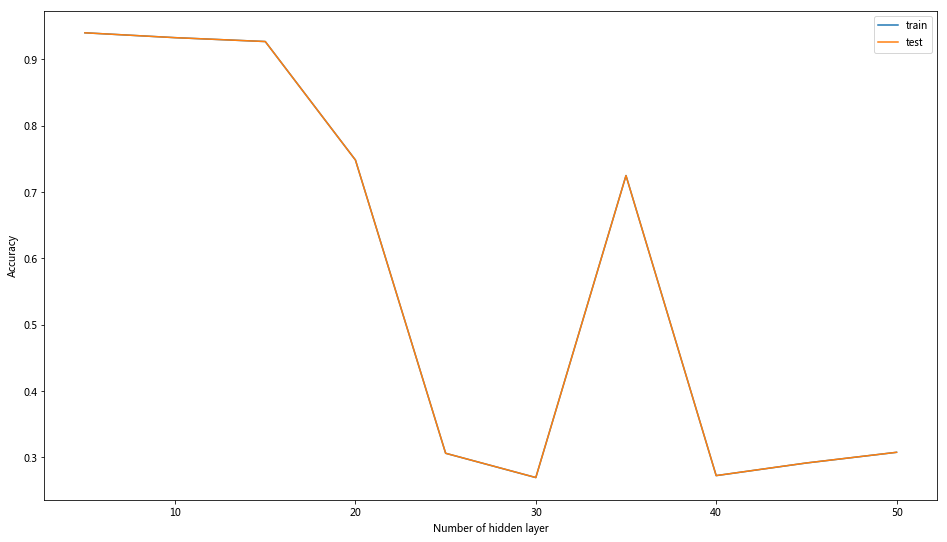

In [42]:
import matplotlib.pyplot as plt
x = np.linspace(5,50,10)
plt.figure(figsize= (16,9))
plt.plot(x,train_Acc_mean,label='train')
plt.plot(x,test_Acc_mean,label='test')
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')
plt.legend()

In [43]:
train_Acc_mean = []
test_Acc_mean = []
for h in range(10):
    H = 5 * (h + 1)
    train_Acc = []
    test_Acc = []
    for i in range(5):
        # Initialize w and learning rate
        w1 = get_w([10, H],10,2)
        w2 = get_w([H, 2 ],10,2)
        lr = 0.001
        #training
        w1, w2 = SBA(data_train[i], label_train[i], w1, w2, lr, 200)
        train_Acc.append(Acc(data_train[i], label_train[i], w1, w2))
        test_Acc.append(Acc(data_test[i], label_test[i], w1, w2))
    print(f'The number of hidden layers is{H}')
    print(f'Training dataset accuracy: {np.mean(np.array(train_Acc))},Testing dataset accuracy: {np.mean(np.array(test_Acc))}')
    train_Acc_mean.append(np.mean(np.array(train_Acc)))
    test_Acc_mean.append(np.mean(np.array(test_Acc)))

The number of hidden layers is5
Training dataset accuracy: 0.9414341295511314,Testing dataset accuracy: 0.9414233576642337
The number of hidden layers is10
Training dataset accuracy: 0.9385064052340102,Testing dataset accuracy: 0.9385036496350365
The number of hidden layers is15
Training dataset accuracy: 0.9297218929760064,Testing dataset accuracy: 0.9297230571060542
The number of hidden layers is20
Training dataset accuracy: 0.7481654847285559,Testing dataset accuracy: 0.7481000429368828


C:\Users\Alienware\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
C:\Users\Alienware\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


The number of hidden layers is25
Training dataset accuracy: 0.6500753359985536,Testing dataset accuracy: 0.6501073422069558
The number of hidden layers is30
Training dataset accuracy: 0.6500753359985536,Testing dataset accuracy: 0.6501073422069558
The number of hidden layers is35
Training dataset accuracy: 0.6500753359985536,Testing dataset accuracy: 0.6501073422069558
The number of hidden layers is40
Training dataset accuracy: 0.6500753359985536,Testing dataset accuracy: 0.6501073422069558
The number of hidden layers is45
Training dataset accuracy: 0.6500753359985536,Testing dataset accuracy: 0.6501073422069558
The number of hidden layers is50
Training dataset accuracy: 0.6500753359985536,Testing dataset accuracy: 0.6501073422069558


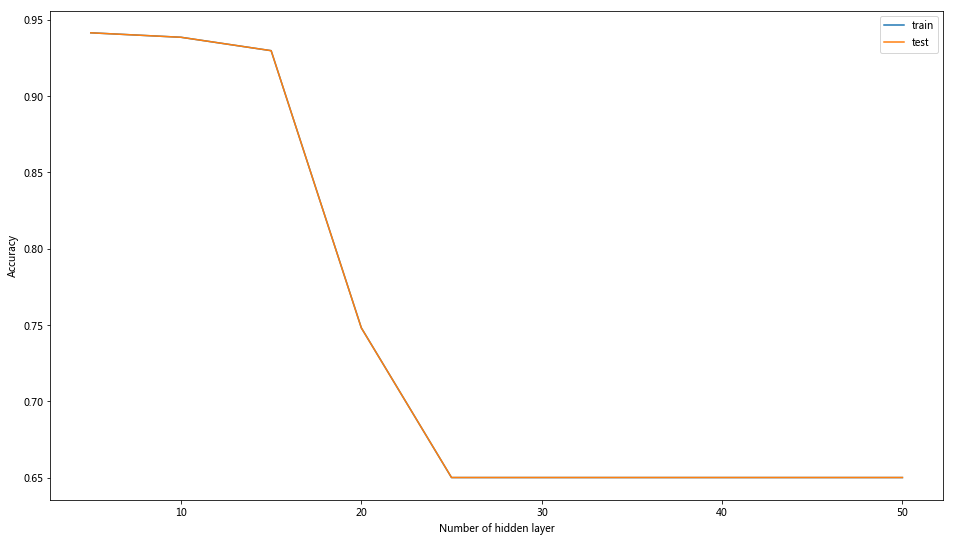

In [46]:
x = np.linspace(5,50,10)
plt.figure(figsize= (16,9))
plt.plot(x,train_Acc_mean,label='train')
plt.plot(x,test_Acc_mean,label='test')
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')
plt.legend()